In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import math

In [2]:
def TimetoNumber(time):
    time=time.zfill(8)
    sec=int(time[:2])*360000+int(time[2:4])*6000+int(time[4:6])*100+int(time[6:8])
    return sec

In [3]:
I020 = [line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I020.csv')][1:]

STime = TimetoNumber('08450000')
Cycle = 6000
lastAmount=0
Qty=[]

In [4]:
for i in I020:
    time=i[0]
    amount=int(i[6])
    if TimetoNumber(time)<STime+Cycle:
        continue
    else:
        Qty.extend([[time,amount-lastAmount]])
        STime+=Cycle
        lastAmount = amount
        
MTime = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I020 ]
MTime1 = [ mdates.date2num(line) for line in MTime ]
Price = [int(line[4]) for line in I020]

QTime = [datetime.datetime.strptime(line[0],"%H%M%S%f") for line in Qty]
QTime1 = [mdates.date2num(line)  for line in QTime ]
QValue = [ line[1] for line in Qty]

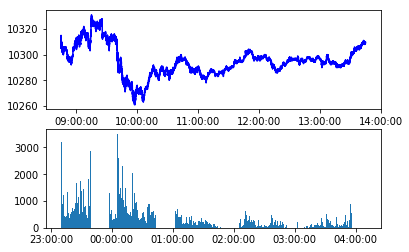

In [5]:
fig = plt.figure(1)
ax1=fig.add_subplot(211)
ax1.plot_date(MTime1, Price, 'b-')

ax2 = fig.add_subplot(212)
ax2.bar(QTime, QValue, Width=0.0005)

hfmt = mdates.DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(hfmt)
ax2.xaxis.set_major_formatter(hfmt)

In [6]:
I080 = [line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I080.csv')][1:]
I080 = [line for line in I080 if int(line[0])>8450000]

In [7]:
UpDnTime = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I080]
UpDnTime1 = [ mdates.date2num(line) for line in UpDnTime]
DnQty = [ (int(line[3])+int(line[5])+int(line[7])+int(line[9])+int(line[11]))*-1 for line in I080]
UpQty = [ (int(line[13])+int(line[15])+int(line[17])+int(line[19])+int(line[21])) for line in I080]

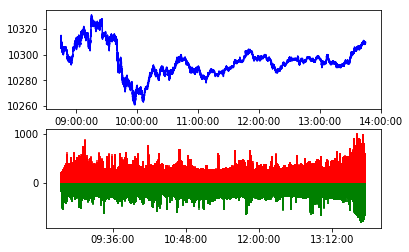

In [8]:
#34
fig = plt.figure(1)
ax1=fig.add_subplot(211)
ax1.plot_date(MTime1, Price, 'b-')

ax2 = fig.add_subplot(212)
ax2.vlines(UpDnTime1, [0], UpQty , 'r')
ax2.vlines(UpDnTime1, DnQty, [0] , 'g')

hfmt = mdates.DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(hfmt)
ax2.xaxis.set_major_formatter(hfmt)
plt.show()

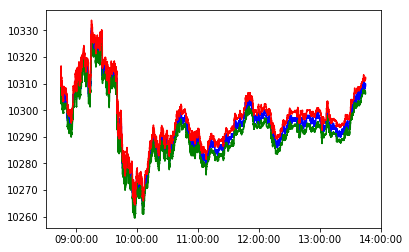

In [9]:
#35
# -*- coding: UTF-8 -*-

#載入相關套件及函數
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#載入成交資訊
I020 = [ line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I020.csv')][1:]
#載入上下五檔價量資訊
I080 = [ line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I080.csv')][1:]
I080 = [ line for line in I080 if int(line[0])>8450000 ]

#取得轉換時間字串至時間格式
MTime = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I020 ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
MTime1 = [ mdates.date2num(line) for line in MTime ]
#價格由字串轉數值
Price = [ int(line[4]) for line in I020 ]

#定義圖表物件
fig = plt.figure(1)
#定義第一張圖案在圖表的位置
ax1 = fig.add_subplot(111)
# 繪製價格折線圖
ax1.plot_date(MTime1, Price, 'b-')

#取得轉換時間字串至時間格式
UpDnTime=[ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I080 ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
UpDnTime1 = [ mdates.date2num(line) for line in UpDnTime ]
#取得下五檔加權平均價
DnAvgP=[ ( int(line[2])*int(line[3])+int(line[4])*int(line[5])+int(line[6])*int(line[7])+int(line[8])*int(line[9])+int(line[10])*int(line[11]) ) / (int(line[3])+int(line[5])+int(line[7])+int(line[9])+int(line[11])) for line in I080 ]
#取得上五檔加權平均價
UpAvgP=[ (int(line[12])*int(line[13])+int(line[14])*int(line[15])+int(line[16])*int(line[17])+int(line[18])*int(line[19])+int(line[20])*int(line[21]) ) /(int(line[13])+int(line[15])+int(line[17])+int(line[19])+int(line[21])) for line in I080 ]

#進行上下平均價格線圖繪製
ax1.plot_date(UpDnTime1, DnAvgP, 'g-')
ax1.plot_date(UpDnTime1, UpAvgP, 'r-')

#定義x軸時間格式
hfmt = mdates.DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(hfmt)

plt.show()

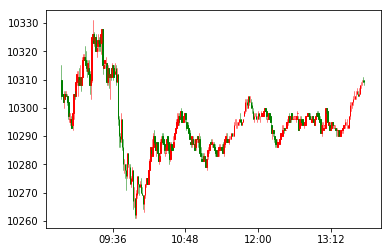

In [54]:
#37-1
# -*- coding: UTF-8 -*-

#載入相關套件及函數
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

#時間轉數值
def TimetoNumber(time):
 time=time.zfill(8)
 sec=int(time[:2])*360000+int(time[2:4])*6000+int(time[4:6])*100+int(time[6:8])
 return sec

#數值轉時間
def NumbertoTime(sec):
 TOS=str(math.floor(sec%100)).zfill(2)
 TTime=sec/100
 TS=str(math.floor(TTime%60)).zfill(2)
 TTime=TTime/60
 TM=str(math.floor(TTime%60)).zfill(2)
 TTime=TTime/60
 TH=str(math.floor(TTime%60)).zfill(2)
 return TH+TM+TS

#取得成交資訊
I020 = [ line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I020.csv')][1:]

#設定K線初始變數
STime = TimetoNumber('08450000')
#設定K線週期
Cycle = 6000
OHLC=[]
lastAmount=0

#計算每分鐘OHLC
for i in I020:
 time = TimetoNumber(i[0])
 price = int(i[4])
 amount = int(i[6])
 if len(OHLC)==0:
  OHLC+=[[mdates.date2num(datetime.datetime.strptime(NumbertoTime(STime),"%H%M%S")),price,price,price,price,0]]
 if time<STime+Cycle:
  if price>OHLC[-1][2]:
   OHLC[-1][2]=price
  if price<OHLC[-1][3]:
   OHLC[-1][3]=price
  OHLC[-1][4]=price
 else:
  OHLC[-1][5]=amount-lastAmount
  lastAmount=amount
  STime+=Cycle
  OHLC+=[[mdates.date2num(datetime.datetime.strptime(NumbertoTime(STime+Cycle),"%H%M%S")),price,price,price,price,0]]


#定義圖表物件
fig = plt.figure(1)
#定義第一張圖案在圖表的位置
ax1 = fig.add_subplot(111)

#繪製K線圖
candlestick_ohlc(ax1, OHLC, width=0.0005, colorup='r', colordown='g')

#定義x軸時間格式
hfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(hfmt)

plt.show()

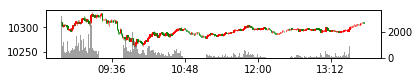

In [53]:
#37-2
# -*- coding: UTF-8 -*-

#載入相關套件及函數
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
from mpl_finance import candlestick_ohlc

#時間轉數值
def TimetoNumber(time):
 time=time.zfill(8)
 sec=int(time[:2])*360000+int(time[2:4])*6000+int(time[4:6])*100+int(time[6:8])
 return sec

#數值轉時間
def NumbertoTime(sec):
 TOS=str(math.floor(sec%100)).zfill(2)
 TTime=sec/100
 TS=str(math.floor(TTime%60)).zfill(2)
 TTime=TTime/60
 TM=str(math.floor(TTime%60)).zfill(2)
 TTime=TTime/60
 TH=str(math.floor(TTime%60)).zfill(2)
 return TH+TM+TS

#取得成交資訊
I020 = [ line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I020.csv')][1:]

#設定K線初始變數
STime = TimetoNumber('08450000')
#設定K線週期
Cycle = 6000
OHLC=[]
lastAmount=0

#計算每分鐘OHLC
for i in I020:
 time = TimetoNumber(i[0])
 price = int(i[4])
 amount = int(i[6])
 if len(OHLC)==0:
  OHLC+=[[mdates.date2num(datetime.datetime.strptime(NumbertoTime(STime+Cycle),"%H%M%S")),price,price,price,price,0]]
 if time<STime+Cycle:
  if price>OHLC[-1][2]:
   OHLC[-1][2]=price
  if price<OHLC[-1][3]:
   OHLC[-1][3]=price
  OHLC[-1][4]=price
 else:
  OHLC[-1][5]=amount-lastAmount
  lastAmount=amount
  STime+=Cycle
  OHLC+=[[mdates.date2num(datetime.datetime.strptime(NumbertoTime(STime+Cycle),"%H%M%S")),price,price,price,price,0]]


#定義圖表物件
fig = plt.figure(1)
#定義第一張圖案在圖表的位置
ax1 = fig.add_subplot(111)

#繪製K線圖
candlestick_ohlc(ax1, OHLC, width=0.0005, colorup='r', colordown='g')

#設定K線圖佔圖表版面比例
pad = 0.25
yl = ax1.get_ylim()
ax1.set_ylim(yl[0]-(yl[1]-yl[0])*pad,yl[1])

#定義時間陣列、量陣列
Time= [ line[0] for line in OHLC ]
Qty= [ line[5] for line in OHLC ]

#設定兩張圖表重疊
ax2 = ax1.twinx()
#繪製量能圖
ax2.bar(Time, Qty, color='gray', width = 0.0005, alpha = 0.75)
#將量能圖定位在K線圖下方
ax2.set_position(matplotlib.transforms.Bbox([[0.125,0.11],[0.9,0.275]]))

#定義x軸時間格式
hfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(hfmt)

plt.show()

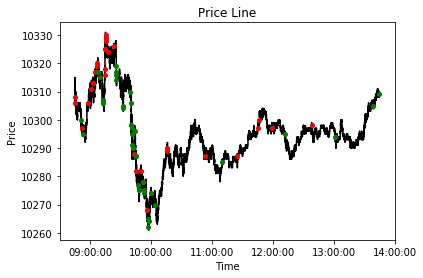

In [16]:
#38
# -*- coding: UTF-8 -*-

#載入相關套件及函數
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#取得成交資訊
I020 = [ line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I020.csv')][1:]

BPoint=[]
SPoint=[]
for i in range(1,len(I020)):
 diffBOrder=int(I020[i][7])-int(I020[i-1][7])
 diffSOrder=int(I020[i][8])-int(I020[i-1][8])
 if diffBOrder==1 and diffSOrder>=30:
  BPoint+=[I020[i]]
 if diffSOrder==1 and diffBOrder>=30:
  SPoint+=[I020[i]]



#取得轉換時間字串至時間格式
Time = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I020 ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
Time1 = [ mdates.date2num(line) for line in Time ]
#價格由字串轉數值
Price = [ int(line[4]) for line in I020 ]

#取得轉換時間字串至時間格式
BPTime = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in BPoint ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
BPTime1 = [ mdates.date2num(line) for line in BPTime ]
#價格由字串轉數值
BPPrice = [ int(line[4]) for line in BPoint ]

#取得轉換時間字串至時間格式
SPTime = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in SPoint ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
SPTime1 = [ mdates.date2num(line) for line in SPTime ]
#價格由字串轉數值
SPPrice = [ int(line[4]) for line in SPoint ]

#定義圖表物件
ax = plt.figure(1) 		#第一張圖片              
ax = plt.subplot(111)	#該張圖片僅一個圖案
#以上兩行，可簡寫如下一行
#fig,ax = plt.subplots()

#定義title
plt.title('Price Line')
plt.xlabel('Time')
plt.ylabel('Price')

#繪製圖案
#plot_date(X軸物件, Y軸物件, 線風格)
ax.plot_date(Time1, Price, 'k-')
ax.plot_date(BPTime1, BPPrice, 'r.',markersize='8')
ax.plot_date(SPTime1, SPPrice, 'g.',markersize='8')

#定義x軸
hfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(hfmt)

#顯示繪製圖表
plt.show()


In [11]:
from mpl_finance import candlestick_ohlc

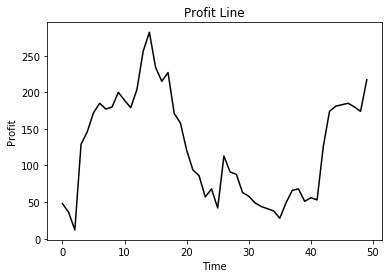

In [19]:
#39
# -*- coding: UTF-8 -*-

#載入相關套件及函數
import matplotlib.pyplot as plt

#取得成交資訊
log = [ line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/Strategy_Sample_Python/回測範例/profit.log')]

profit=0
profitList=[]
for i in log:
 if i[5]=="B":
  profit+=int(i[9])-int(i[4])
 if i[5]=="S":
  profit+=int(i[4])-int(i[9])
 profitList+=[profit]

# print profitList

#定義圖表物件
ax = plt.figure(1) 		#第一張圖片              
ax = plt.subplot(111)	#該張圖片僅一個圖案
#以上兩行，可簡寫如下一行
#fig,ax = plt.subplots()

#定義title
plt.title('Profit Line')
plt.xlabel('Time')
plt.ylabel('Profit')

#繪製圖案
#plot_date(X軸物件, Y軸物件, 線風格)
ax.plot(profitList, 'k-')

#顯示繪製圖表
plt.show()